This is run on a 2011 MacBook Pro, 2.7 GHz Intel i7, 2 cores

In [1]:
from random import uniform
from math import sqrt
from time import time
import numpy as np

In [2]:
# Simple version of pi approximation
def simple(nDarts, nInCirc=0):
    startTime = time()
    for n in range(nDarts):
        x, y = uniform(0,1), uniform(0,1)
        if sqrt((x-.5)**2 + (y-.5)**2) <= 0.5:
            nInCirc += 1
    executionTime = time() - startTime
    piApprox = 4 * nInCirc / float(nDarts)
    return(piApprox, executionTime, nDarts/executionTime)
    
# find computational time as f'n of nDarts
darts = np.logspace(1,7,100)
simpleResults = []
for d in darts:
    simpleResults.append(simple(int(d)))

In [3]:
from multiprocessing import Pool

In [4]:
# function to check one dart (will be mapped to pool)
def checkDart(i):
    x, y = uniform(0,1), uniform(0,1)
    if sqrt((x-.5)**2 + (y-.5)**2) <= 0.5:
        return 1
    return 0

# multiprocessing version of the pi approximation
def multi(nDarts, nInCirc = 0):
    pool = Pool(processes=4)
    startTime = time()
    res = pool.map(checkDart, range(nDarts))
    nInCirc = sum(res)
    executionTime = time() - startTime
    piApprox = 4 * nInCirc / float(nDarts)
    pool.terminate()
    del pool
    return(piApprox, executionTime, nDarts/executionTime)

# find computational time as f'n of nDarts
darts = np.logspace(1,7,100)
multiResults = []
for d in darts:
    multiResults.append(multi(int(d)))

In [ ]:
# You need to have an ipcluster started! Use:
# ipcluster start -n 4

In [5]:
import ipyparallel as ipp
from ipyparallel import Client

# ipyparallel version of pi approximation
def pypar(nDarts, nInCirc = 0):
    rc = Client()
    rc.block = True
    rc[:].execute('from random import uniform')
    rc[:].execute('from math import sqrt')
    startTime = time()
    res = rc[:].map_sync(checkDart, range(nDarts))
    nInCirc = sum(res)
    executionTime = time() - startTime
    piApprox = 4 * nInCirc / float(nDarts)
    return(piApprox, executionTime, nDarts/executionTime)

# find computational time as f'n of nDarts
darts = np.logspace(1,7,100)
pyparResults = []
for d in darts:
    pyparResults.append(multi(int(d)))

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
sns.set_style({"xtick.direction":u'in', "ytick.direction":u'in', "lines.linewidth":2})
%matplotlib inline

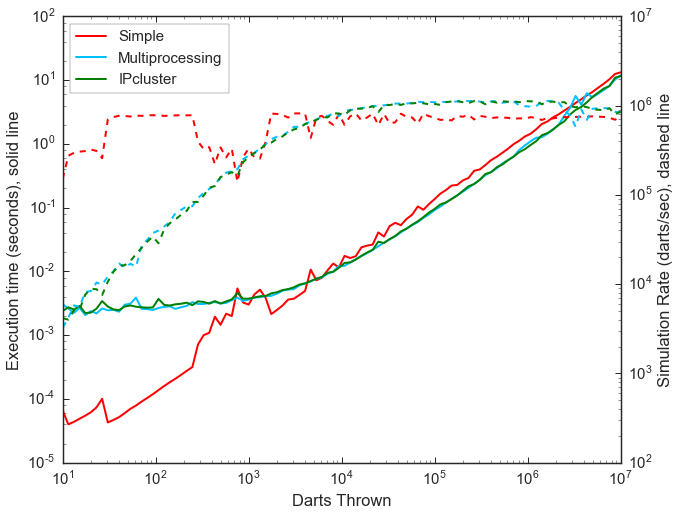

In [7]:
f, ax = plt.subplots(figsize=(10,8))
ax.loglog(darts, [i[1] for i in simpleResults], 'r-', label='Simple')
ax.loglog(darts, [i[1] for i in multiResults], color='DeepSkyBlue', label='Multiprocessing')
ax.loglog(darts, [i[1] for i in pyparResults], color='green', label='IPcluster')
ax2 = ax.twinx()
ax2.loglog(darts, [i[2] for i in simpleResults], ls='dashed', color='r')
ax2.loglog(darts, [i[2] for i in multiResults], ls='dashed', color='DeepSkyBlue')
ax2.loglog(darts, [i[2] for i in pyparResults], ls='dashed', color='green')
ax.set_xlabel('Darts Thrown');
ax.set_ylabel('Execution time (seconds), solid line');
ax2.set_ylabel('Simulation Rate (darts/sec), dashed line');
ax2.set_ylim((1e2, 1e7));
ax.legend(loc='upper left', frameon=True);